# 0. 프로젝트 개요
온라인 배달 시장의 성장이 지속되면서 단순히 음식 배달을 넘어 온라인으로 장을 보고 배달을 받는 온라인 장보기 서비스가 일반화 되고 있다. 그리고 단순한 배달을 넘어 장을 본지 1~2시간 내 배송을 지원하는 `퀵커머스` 가 대두되고 있다. 

국내의 경우 대형마트를 필두로 유통계의 대기업부터 편의점까지 빠른 배송 서비스를 진행한다. 최근 GS리테일은 새벽 배송 서비스를 중단하고 즉시 배송 서비스를 런칭하였듯 많은 기업이 퀵커머스 시장을 선점하기 노력중이다. 

하지만 아직 배송이나 물류 창고 등에 막대한 투자 비용이 든다. 단기적으로 큰 수익성을 기대할 수 없는 것도 문제다. 퀵커머스는 생필품 등이 주요 상품이다. 상대적으로 마진이 높지 않다. 경쟁자가 많아질수록 '더 싸게 더 빠르게' 팔아야 하는 딜레마에 빠질 수 있다.

따라서 퀵커머스를 지향하는 기업은 낮은 비용과 고객을 유치하고 유지하는 전략을 세우는 것이 필수이다. 본 프로젝트는 미국, 캐나다의 대표적인 식료품 배송 서비스 기업인 Instacart의 데이터를 분석하여 고객의 구매행태를 분석하고 고객을 세분화 하여서 재구매 고객 유지를 위한 서비스를 제안하고자 한다.

Instacart와 국내 기업들의 수익 구조적 차이는 존재하지만 Instacart의 데이터 분석을 국내 배송 서비스에 접목시켜 대형마트가 아닌 일반 소매점의 배달서비스를 담당하는 회사에도 적용을 할 수 있도록 프로젝트를 진행할 것이다.

# 1. 데이터 불러오기

In [ ]:
from pandas.core.generic import InvalidIndexError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_aisles = pd.read_csv('/content/drive/MyDrive/instacart_data/aisles.csv') # 제품 상세 카테고리
df_departments = pd.read_csv('/content/drive/MyDrive/instacart_data/departments.csv') # 제품 카테고리
df_order_prod_prior = pd.read_csv('/content/drive/MyDrive/instacart_data/order_products__prior.csv') # 과거 구매자 주문 내역
df_order_prod_train = pd.read_csv('/content/drive/MyDrive/instacart_data/order_products__train.csv') # 현재 구매자 주문 내역
df_orders = pd.read_csv('/content/drive/MyDrive/instacart_data/orders.csv') # 주문 정보
df_prod = pd.read_csv('/content/drive/MyDrive/instacart_data/products.csv') # 제품 정보

In [ ]:
print('과거 구매자 주문 내역')
print(df_order_prod_prior.head(3))
print('주문 정보')
print(df_orders.head(3))
print('제품 정보')
print(df_prod.head(3))
print('제품 카테고리')
print(df_departments.head(3))
print('제품 상세 카테고리')
print(df_aisles.head(3))

과거 구매자 주문 내역
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
주문 정보
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
제품 정보
   product_id                          product_name  aisle_id  department_id
0           1            Chocolate Sandwich Cookies        61             19
1           2                      All-Seasons Salt       104             13
2           3  Robust Golden Unsweetened Oolong Tea        94              7
제품 카테고리
   department_id depar

In [ ]:
# 데이터 병합

temp = pd.merge(df_order_prod_prior, df_prod, on=["product_id"])
temp = pd.merge(temp, df_orders, on=["order_id"])
temp = pd.merge(temp, df_aisles, on=["aisle_id"])
df = pd.merge(temp, df_departments, on=["department_id"])
del temp
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs,dairy eggs


In [ ]:
print(df.shape)
print(df.info())
df.isnull().sum()

(32434489, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   user_id                 int64  
 8   eval_set                object 
 9   order_number            int64  
 10  order_dow               int64  
 11  order_hour_of_day       int64  
 12  days_since_prior_order  float64
 13  aisle                   object 
 14  department              object 
dtypes: float64(1), int64(10), object(4)
memory usage: 3.9+ GB
None


order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
aisle                           0
department                      0
dtype: int64

# 2. EDA

In [ ]:
# 주문량 상위 10 상품 카테고리 및 재주문량
temp_departments_df = df.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
# agg() : 여러개의 열에 여러가지 함수를 적용
temp_departments_df = temp_departments_df.sort_values('total', ascending=False).reset_index()
temp_departments_df.head()

,department,total,reorders
0,produce,9479291,6160710
1,dairy eggs,5414016,3627221
2,snacks,2887550,1657973
3,beverages,2690129,1757892
4,frozen,2236432,1211890


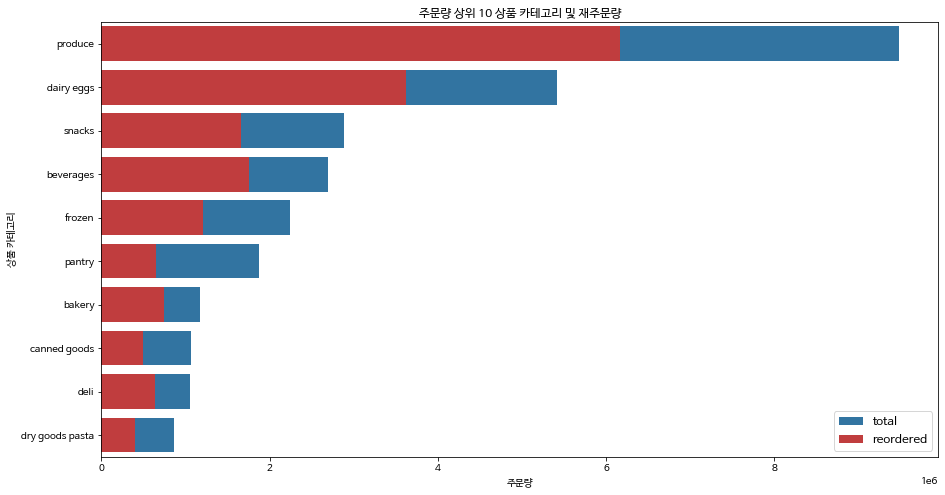

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_departments_df.department[0:10], x = temp_departments_df.total[0:10], color=color[0], label = "total")
ax = sns.barplot(y = temp_departments_df.department[0:10], x = temp_departments_df.reorders[0:10], color=color[3], label = "reordered")
ax.set_ylabel("상품 카테고리")
ax.set_xlabel("주문량")
ax.set_title("주문량 상위 10 상품 카테고리 및 재주문량")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [ ]:
# 재주문율 상위 10 상품 카테고리
temp_departments_df['reorder_ratio'] = temp_departments_df['reorders'] / temp_departments_df['total']
temp_departments_df = temp_departments_df.sort_values('reorder_ratio', ascending=False).reset_index()
temp_departments_df.head()

,index,department,total,reorders,reorder_ratio
0,1,dairy eggs,5414016,3627221,0.669969
1,3,beverages,2690129,1757892,0.653460
2,0,produce,9479291,6160710,0.649913
3,6,bakery,1176787,739188,0.628141
4,8,deli,1051249,638864,0.607719


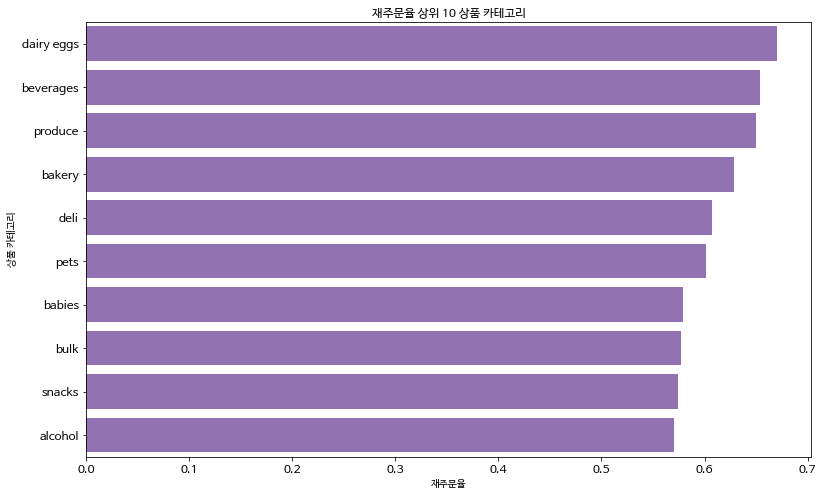

In [ ]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_departments_df.department[0:10], x = temp_departments_df.reorder_ratio[0:10], color=color[4])
ax.set_ylabel("상품 카테고리")
ax.set_xlabel("재주문율")
ax.set_title("재주문율 상위 10 상품 카테고리")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [ ]:
# 주문량 상위 10 상품 상세 카테고리 및 재주문량
temp_aisles_df = df.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_aisles_df = temp_aisles_df.sort_values('total', ascending=False).reset_index()
temp_aisles_df.head()

,aisle,total,reorders
0,fresh fruits,3642188,2615469
1,fresh vegetables,3418021,2032172
2,packaged vegetables fruits,1765313,1127177
3,yogurt,1452343,997018
4,packaged cheese,979763,573383


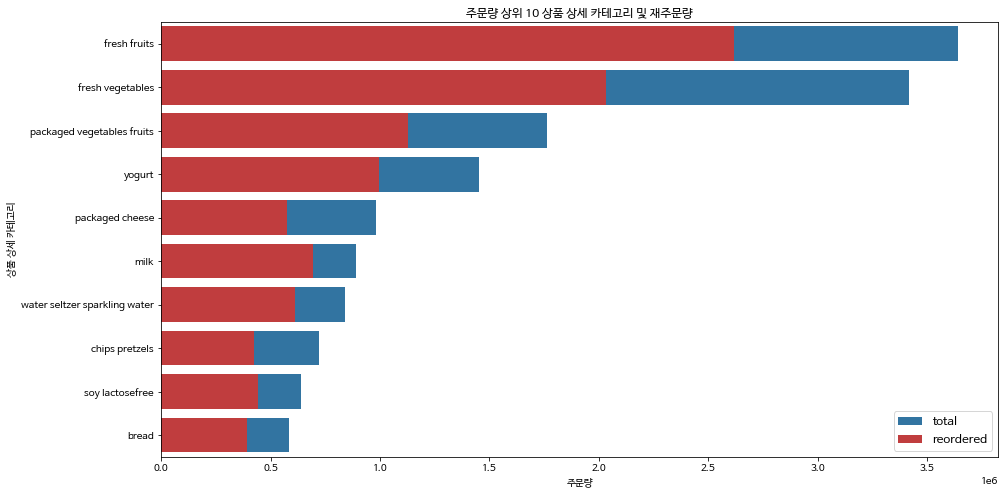

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_aisles_df.aisle[0:10], x = temp_aisles_df.total[0:10], color=color[0], label = "total")
ax = sns.barplot(y = temp_aisles_df.aisle[0:10], x = temp_aisles_df.reorders[0:10], color=color[3], label = "reordered")
ax.set_ylabel("상품 상세 카테고리")
ax.set_xlabel("주문량")
ax.set_title("주문량 상위 10 상품 상세 카테고리 및 재주문량")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [ ]:
# 재주문율 상위 10 상품 상세 카테고리
temp_aisles_df['reorder_ratio'] = temp_aisles_df['reorders'] / temp_aisles_df['total']
temp_aisles_df = temp_aisles_df.sort_values('reorder_ratio', ascending=False).reset_index()
temp_aisles_df.head()

,index,aisle,total,reorders,reorder_ratio
0,5,milk,891015,696264,0.781428
1,6,water seltzer sparkling water,841533,613977,0.729593
2,0,fresh fruits,3642188,2615469,0.718104
3,15,eggs,452134,318920,0.705366
4,8,soy lactosefree,638253,442023,0.692551


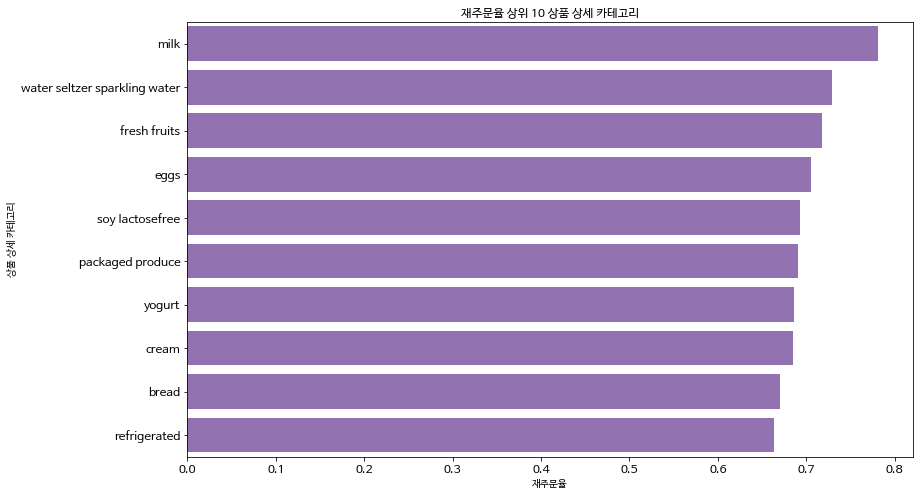

In [ ]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_aisles_df.aisle[0:10], x = temp_aisles_df.reorder_ratio[0:10], color=color[4])
ax.set_ylabel("상품 상세 카테고리")
ax.set_xlabel("재주문율")
ax.set_title("재주문율 상위 10 상품 상세 카테고리")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [ ]:
# 주문량 상위 10 인기상품 및 재주문량
temp_products_df = df.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_products_df = temp_products_df.sort_values('total', ascending=False).reset_index()
temp_products_df.head()

,product_name,total,reorders
0,Banana,472565,398609
1,Bag of Organic Bananas,379450,315913
2,Organic Strawberries,264683,205845
3,Organic Baby Spinach,241921,186884
4,Organic Hass Avocado,213584,170131


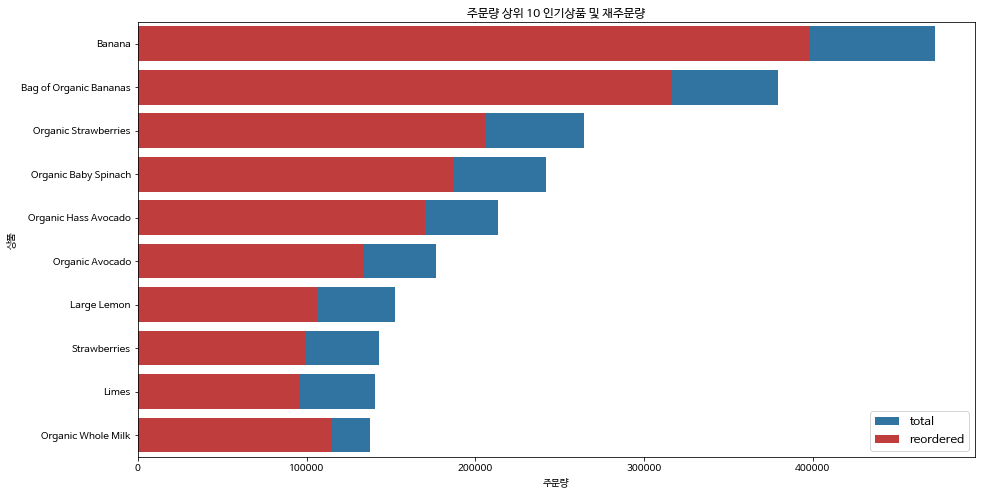

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_products_df.product_name[0:10], x = temp_products_df.total[0:10], color=color[0], label = "total")
ax = sns.barplot(y = temp_products_df.product_name[0:10], x = temp_products_df.reorders[0:10], color=color[3], label = "reordered")
ax.set_ylabel("상품")
ax.set_xlabel("주문량")
ax.set_title("주문량 상위 10 인기상품 및 재주문량")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [ ]:
# 재주문율 상위 10 인기상품
temp_products_df['reorder_ratio'] = temp_products_df['reorders'] / temp_products_df['total']
temp_products_df = temp_products_df.sort_values('reorder_ratio', ascending=False).reset_index()
temp_products_df.head()

,index,product_name,total,reorders,reorder_ratio
0,23522,Raw Veggie Wrappers,68,64,0.941176
1,21266,Serenity Ultimate Extrema Overnight Pads,87,81,0.931034
2,39641,Orange Energy Shots,13,12,0.923077
3,19939,Chocolate Love Bar,101,93,0.920792
4,30222,Soy Powder Infant Formula,35,32,0.914286


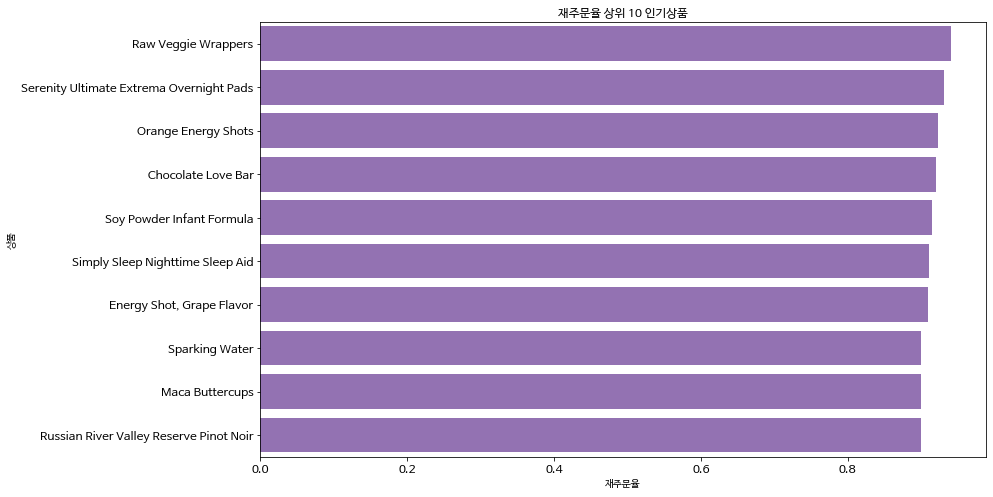

In [ ]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_products_df.product_name[0:10], x = temp_products_df.reorder_ratio[0:10], color=color[4])
ax.set_ylabel("상품")
ax.set_xlabel("재주문율")
ax.set_title("재주문율 상위 10 인기상품")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


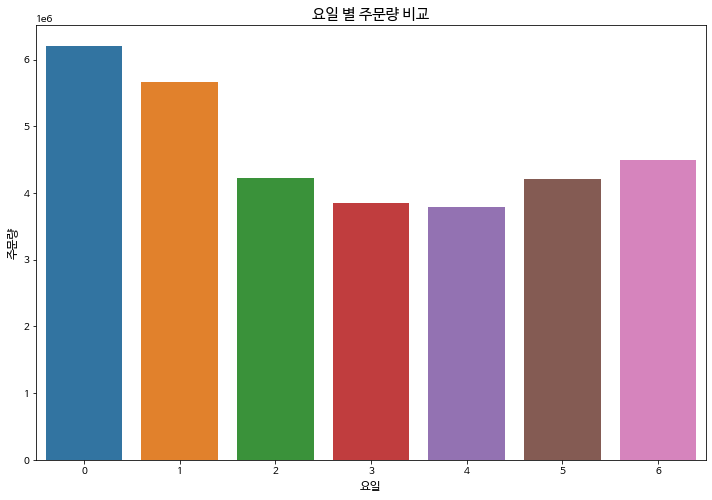

In [ ]:
# 요일 별 주문량 비교

plt.figure(figsize=(12,8))
sns.countplot(df['order_dow'])
plt.ylabel('주문량', fontsize=12)
plt.xlabel('요일', fontsize=12)
plt.title('요일 별 주문량 비교', fontsize=15);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


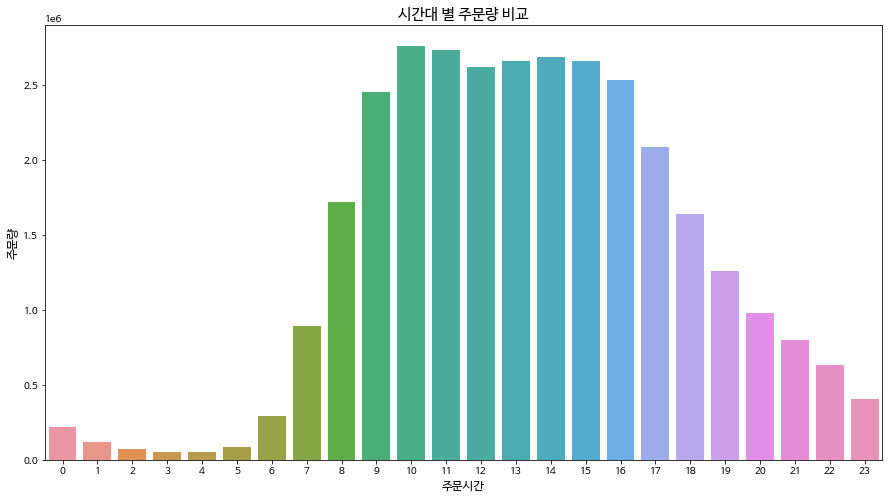

In [ ]:
# 시간대 별 주문량 비교

plt.figure(figsize=(15,8))
sns.countplot(df['order_hour_of_day'])
plt.ylabel('주문량', fontsize=12)
plt.xlabel('주문시간', fontsize=12)
plt.title('시간대 별 주문량 비교', fontsize=15);

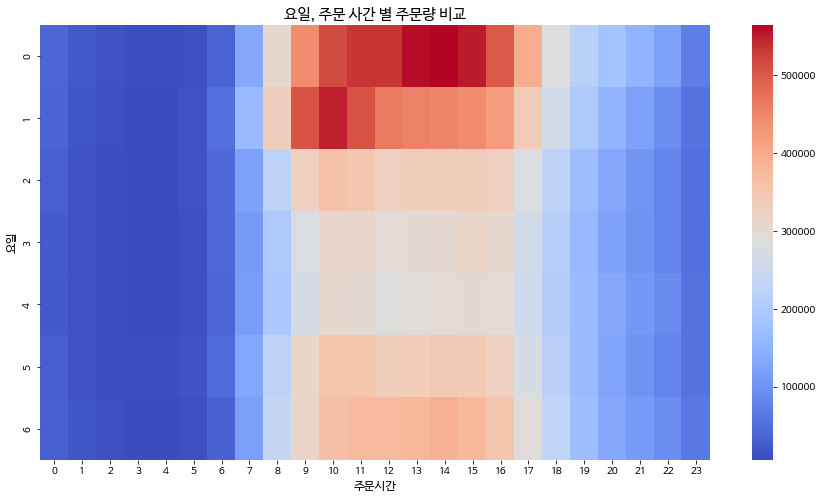

In [ ]:
# 요일, 주문 사간 별 주문량 비교

days_hours = df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
days_hours = days_hours.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(15,8))
sns.heatmap(days_hours, cmap='coolwarm')
plt.title('요일, 주문 사간 별 주문량 비교', fontsize=15)
plt.ylabel('요일', fontsize = 12)
plt.xlabel('주문시간', fontsize = 12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


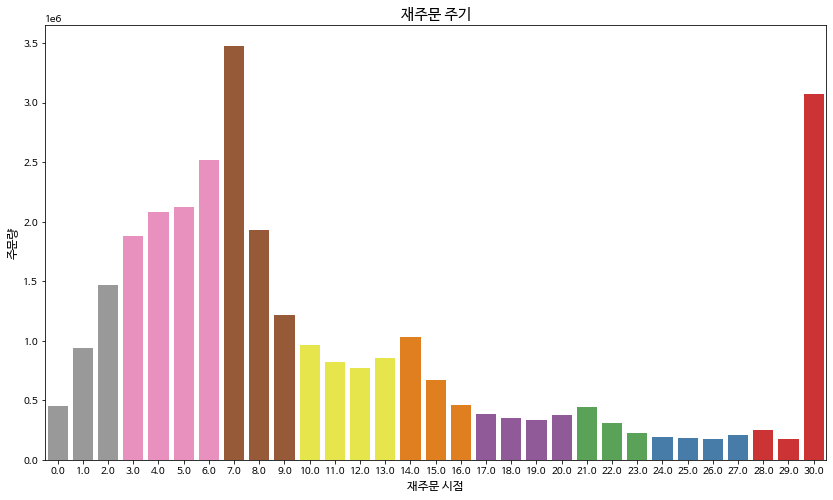

In [ ]:
# 재주문 주기 
plt.figure(figsize=(14,8))
sns.countplot(df['days_since_prior_order'], palette = 'Set1_r')
plt.ylabel('주문량', fontsize=12)
plt.xlabel('재주문 시점', fontsize=12)
plt.title('재주문 주기', fontsize=15)
plt.show();

# 3. 고객 세그멘테이션 

## 1) PCA 
- clustering을 통한 고객 분류 이전에 특성에 대한 차원 축소.
- 분류 기준은 aisles(상품 상세 카테고리)이 적절할 것으로 판단.

In [ ]:
# pca를 위한 데이터 프레임 만들기

temp_pca_df = pd.crosstab(df['user_id'], df['aisle'])
temp_pca_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# StandardScaler()를 사용하여 데이터 표준화 
#scaler = StandardScaler()
#temp_pca_df = scaler.fit_transform(temp_pca_df)
#print("\n Standardized Data: \n", temp_pca_df)

pca = PCA(n_components=7)
pca.fit(temp_pca_df)
pca_df = pca.transform(temp_pca_df)

pca_df = pd.DataFrame(pca_df)
print("\n Projected Data: \n", pca_df)


 Projected Data: 
                 0          1          2          3         4          5  \
0      -24.215659   2.429427  -2.466370  -0.145681  0.269055  -1.432755   
1        6.463208  36.751116   8.382553  15.097530 -6.920934  -0.978339   
2       -7.990302   2.404383 -11.030064   0.672239 -0.442365  -2.823118   
3      -27.991129  -0.755823  -1.921732   2.091888 -0.288228   0.926198   
4      -19.896394  -2.637225   0.533229   3.679231  0.612828  -1.623953   
...           ...        ...        ...        ...       ...        ...   
206204 -24.200168   1.369802   1.325348   4.935903  0.318349   0.004891   
206205  -4.837135  -0.152500   5.263276 -21.059406  0.728541 -13.415968   
206206   8.611433   7.701299   7.952402  -5.906237  1.718246  -3.266852   
206207  84.086220  20.418734   8.054107 -15.558599  9.035234 -37.417508   
206208 -13.953456   6.646218  -5.230303  -0.979936  1.539632  -5.098273   

                6  
0        2.142516  
1        6.012066  
2       -6.283449  

In [ ]:
pca_df = pca_df.reset_index()
pca_df

,index,0,1,2,3,4,5,6
0,0,-24.215659,2.429427,-2.466370,-0.145681,0.269055,-1.432755,2.142516
1,1,6.463208,36.751116,8.382553,15.097530,-6.920934,-0.978339,6.012066
2,2,-7.990302,2.404383,-11.030064,0.672239,-0.442365,-2.823118,-6.283449
3,3,-27.991129,-0.755823,-1.921732,2.091888,-0.288228,0.926198,0.827523
4,4,-19.896394,-2.637225,0.533229,3.679231,0.612828,-1.623953,-3.935466
...,...,...,...,...,...,...,...,...
206204,206204,-24.200168,1.369802,1.325348,4.935903,0.318349,0.004891,0.398322
206205,206205,-4.837135,-0.152500,5.263276,-21.059406,0.728541,-13.415968,13.338668
206206,206206,8.611433,7.701299,7.952402,-5.906237,1.718246,-3.266852,-5.629643
206207,206207,84.086220,20.418734,8.054107,-15.558599,9.035234,-37.417508,-16.398797


In [ ]:
# 분산 비율 
pca.explained_variance_ratio_

array([0.48237998, 0.09585824, 0.05185877, 0.03590181, 0.0293466 ,
       0.02393094, 0.01899492])

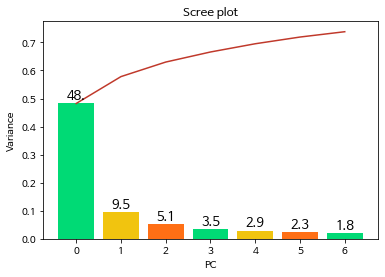

In [ ]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

## 2) KMeans Clustering
- 주문 데이터 기준으로 고객 분류를 위해 KMeans Clustering 사용

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


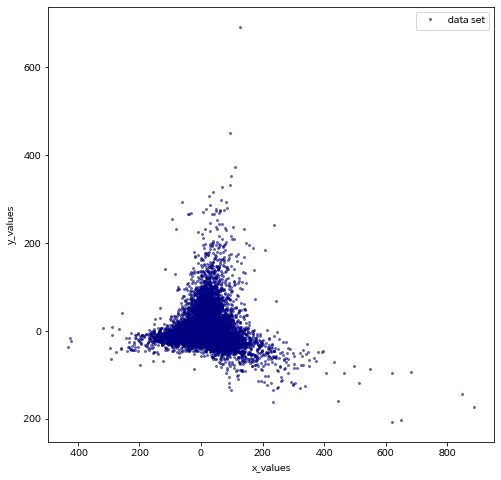

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(pca_df[[1, 4]]) # 다양한 조합을 시도해보고 적당한 조합 선정

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[1], tocluster[4], 'o', markersize=2, color='navy', alpha=0.5, label='data set')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[  0.10233217  -0.11845768]
 [ 65.33406503 -11.294296  ]
 [-40.58312235  -4.70807621]
 [ 26.26358548  76.82339421]]


['orange', 'purple', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


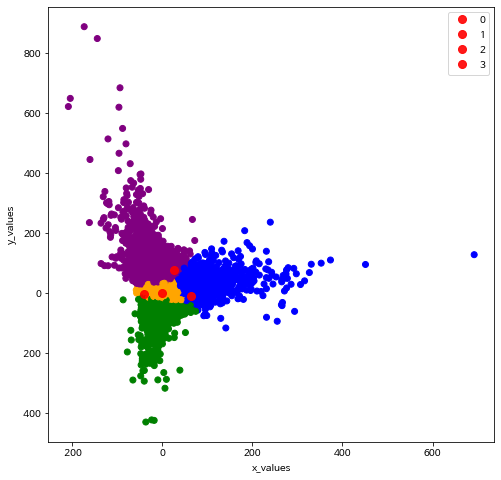

In [ ]:
# 4개의 cluster로 나누기
fig = plt.figure(figsize=(8,8))
colors = ['orange','purple','green','blue']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [ ]:
# 클러스터 확인
cluster_labels = clusterer.labels_
temp_pca_df['cluster'] = cluster_labels
temp_pca_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


In [ ]:
# 그룹별로 나누기 -> 그룹별 상품 주문 평균
group1 = temp_pca_df[temp_pca_df['cluster']==0].drop('cluster',axis=1).mean()
group2 = temp_pca_df[temp_pca_df['cluster']==1].drop('cluster',axis=1).mean()
group3 = temp_pca_df[temp_pca_df['cluster']==2].drop('cluster',axis=1).mean()
group4 = temp_pca_df[temp_pca_df['cluster']==3].drop('cluster',axis=1).mean()

In [ ]:
pie_df = temp_pca_df['cluster'].value_counts()
pie_df = pd.DataFrame(pie_df)
pie_df

,cluster
0,187274
2,11160
1,5931
3,1844


In [ ]:
pie_df['ratio'] = pie_df['cluster'] / pie_df['cluster'].sum()
pie_df

,cluster,ratio
0,187274,0.908176
2,11160,0.054120
1,5931,0.028762
3,1844,0.008942


In [ ]:
group_1 = pd.DataFrame(group1.sort_values(ascending=False)[0:10])
group_1

,0
aisle,
fresh fruits,12.996203
fresh vegetables,11.259972
packaged vegetables fruits,6.531537
yogurt,4.840170
packaged cheese,3.754606
milk,3.303043
water seltzer sparkling water,3.169522
chips pretzels,2.782864
soy lactosefree,2.349798


In [ ]:
group_2 = pd.DataFrame(group2.sort_values(ascending=False)[0:10])
group_2

,0
aisle,
fresh fruits,84.542404
yogurt,63.034564
packaged vegetables fruits,28.158321
water seltzer sparkling water,25.796156
fresh vegetables,22.910808
milk,22.752150
chips pretzels,19.475805
packaged cheese,19.056314
energy granola bars,19.044175


In [ ]:
group_3 = pd.DataFrame(group3.sort_values(ascending=False)[0:10])
group_3

,0
aisle,
fresh vegetables,96.875269
fresh fruits,51.391756
packaged vegetables fruits,27.902778
fresh herbs,11.309857
packaged cheese,10.643459
yogurt,9.923566
soy lactosefree,8.795699
milk,8.355556
frozen produce,7.808244


In [ ]:
group_4 = pd.DataFrame(group4.sort_values(ascending=False)[0:10])
group_4

,0
aisle,
baby food formula,90.031453
fresh fruits,72.334056
fresh vegetables,50.059111
packaged vegetables fruits,34.557484
yogurt,33.242950
packaged cheese,24.305315
milk,23.996746
bread,12.200651
chips pretzels,11.457701
